# STROKE PREDICTION

### Install necessary Libraries

In [2]:
pip install xgboost

  Using cached xgboost-3.0.0-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-macosx_12_0_arm64.whl (2.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install lightgbm

  Using cached lightgbm-4.6.0-py3-none-macosx_12_0_arm64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-macosx_12_0_arm64.whl (1.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install catboost

  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached plotly-6.0.1-py3-none-any.whl.metadata (6.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 222.7 kB/s eta 0:00:0000:0100:04
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)
Using cached plotly-6.0.1-py3-none-any.whl (14.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install lime

  Using cached lime-0.2.0.1.tar.gz (275 kB)
  Preparing metadata (setup.py) ... done
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached imageio-2.37.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached tifffile-2025.3.30-py3-none-any.whl.metadata (32 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 252.6 kB/s eta 0:00:0000:0100:02
Using cached imageio-2.37.0-py3-none-any.whl (315 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
Using cached tifffile-2025.3.30-py3-none-any.whl (226 kB)
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=e6d672b7baad81eff5baaeb1177b21d977b4e4d7aee2f80b79bdc2ad7ad0f301
  Stored in directory: /Users/rabiulislam/Library/Caches/pip/wheels/7c/04/5c/157dc9106512a6c7a30653ec064490c94a49e0fc8f63d19ab9
Successfully built lime
Note: you may need to restart the kernel

### Import All Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from collections import defaultdict
import lime
import lime.lime_tabular

### Loading the Dataset

In [2]:
# Read Dataset
df = pd.read_csv("/Users/rabiulislam/Documents/North_South_University/Spring_2025/CSE_445/Project/Dataset/stroke_risk_dataset_v2.csv")
df.head()

age  gender  chest_pain  high_blood_pressure  irregular_heartbeat  \
0   22    Male           1                    0                    0   
1   52    Male           0                    1                    1   
2   63  Female           0                    1                    0   
3   41    Male           0                    0                    1   
4   53    Male           0                    0                    0   

   shortness_of_breath  fatigue_weakness  dizziness  swelling_edema  \
0                    0                 0          0               0   
1                    0                 0          0               0   
2                    0                 0          1               0   
3                    0                 1          0               0   
4                    0                 0          1               1   

   neck_jaw_pain  excessive_sweating  persistent_cough  nausea_vomiting  \
0              0                   0                 1                0   
1              0                   0                 0                0   
2              0                   0                 0                0   
3              0                   0                 0                0   
4              0                   0                 0                1   

   chest_discomfort  cold_hands_feet  snoring_sleep_apnea  anxiety_doom  \
0                 0                0                    0             0   
1                 0                1                    1             0   
2                 0                0                    0             0   
3                 0                0                    0             0   
4                 0                1                    0             0   

   stroke_risk_percentage  at_risk  
0                    33.3        0  
1                   100.0        1  
2                   100.0        1  
3                    44.5        0  
4                    84.8        1

### Dataset Preprocessing

In [3]:
df.isnull().sum()

age                       0
gender                    0
chest_pain                0
high_blood_pressure       0
irregular_heartbeat       0
shortness_of_breath       0
fatigue_weakness          0
dizziness                 0
swelling_edema            0
neck_jaw_pain             0
excessive_sweating        0
persistent_cough          0
nausea_vomiting           0
chest_discomfort          0
cold_hands_feet           0
snoring_sleep_apnea       0
anxiety_doom              0
stroke_risk_percentage    0
at_risk                   0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     35000 non-null  int64  
 1   gender                  35000 non-null  object 
 2   chest_pain              35000 non-null  int64  
 3   high_blood_pressure     35000 non-null  int64  
 4   irregular_heartbeat     35000 non-null  int64  
 5   shortness_of_breath     35000 non-null  int64  
 6   fatigue_weakness        35000 non-null  int64  
 7   dizziness               35000 non-null  int64  
 8   swelling_edema          35000 non-null  int64  
 9   neck_jaw_pain           35000 non-null  int64  
 10  excessive_sweating      35000 non-null  int64  
 11  persistent_cough        35000 non-null  int64  
 12  nausea_vomiting         35000 non-null  int64  
 13  chest_discomfort        35000 non-null  int64  
 14  cold_hands_feet         35000 non-null

In [5]:
df.describe()

age    chest_pain  high_blood_pressure  irregular_heartbeat  \
count  35000.000000  35000.000000         35000.000000         35000.000000   
mean      38.630171      0.145857             0.251914             0.098457   
std       11.564128      0.352968             0.434118             0.297936   
min       18.000000      0.000000             0.000000             0.000000   
25%       30.000000      0.000000             0.000000             0.000000   
50%       37.000000      0.000000             0.000000             0.000000   
75%       46.000000      0.000000             1.000000             0.000000   
max       86.000000      1.000000             1.000000             1.000000   

       shortness_of_breath  fatigue_weakness     dizziness  swelling_edema  \
count         35000.000000      35000.000000  35000.000000    35000.000000   
mean              0.190057          0.244543      0.190686        0.145943   
std               0.392352          0.429822      0.392847        0.353054   
min               0.000000          0.000000      0.000000        0.000000   
25%               0.000000          0.000000      0.000000        0.000000   
50%               0.000000          0.000000      0.000000        0.000000   
75%               0.000000          0.000000      0.000000        0.000000   
max               1.000000          1.000000      1.000000        1.000000   

       neck_jaw_pain  excessive_sweating  persistent_cough  nausea_vomiting  \
count   35000.000000        35000.000000      35000.000000     35000.000000   
mean        0.099514            0.097514          0.105971         0.097543   
std         0.299356            0.296661          0.307805         0.296700   
min         0.000000            0.000000          0.000000         0.000000   
25%         0.000000            0.000000          0.000000         0.000000   
50%         0.000000            0.000000          0.000000         0.000000   
75%         0.000000            0.000000          0.000000         0.000000   
max         1.000000            1.000000          1.000000         1.000000   

       chest_discomfort  cold_hands_feet  snoring_sleep_apnea  anxiety_doom  \
count      35000.000000     35000.000000         35000.000000  35000.000000   
mean           0.143771         0.194571             0.147086      0.098543   
std            0.350863         0.395876             0.354196      0.298052   
min            0.000000         0.000000             0.000000      0.000000   
25%            0.000000         0.000000             0.000000      0.000000   
50%            0.000000         0.000000             0.000000      0.000000   
75%            0.000000         0.000000             0.000000      0.000000   
max            1.000000         1.000000             1.000000      1.000000   

       stroke_risk_percentage       at_risk  
count            35000.000000  35000.000000  
mean                44.484054      0.368200  
std                 29.894012      0.482323  
min                  1.500000      0.000000  
25%                 19.900000      0.000000  
50%                 38.700000      0.000000  
75%                 64.500000      1.000000  
max                100.000000      1.000000

In [6]:
# Encoding Gender and Dropping Risk Percentage 
df['gender'] = LabelEncoder().fit_transform(df['gender'])
df = df.drop(columns=["stroke_risk_percentage"])

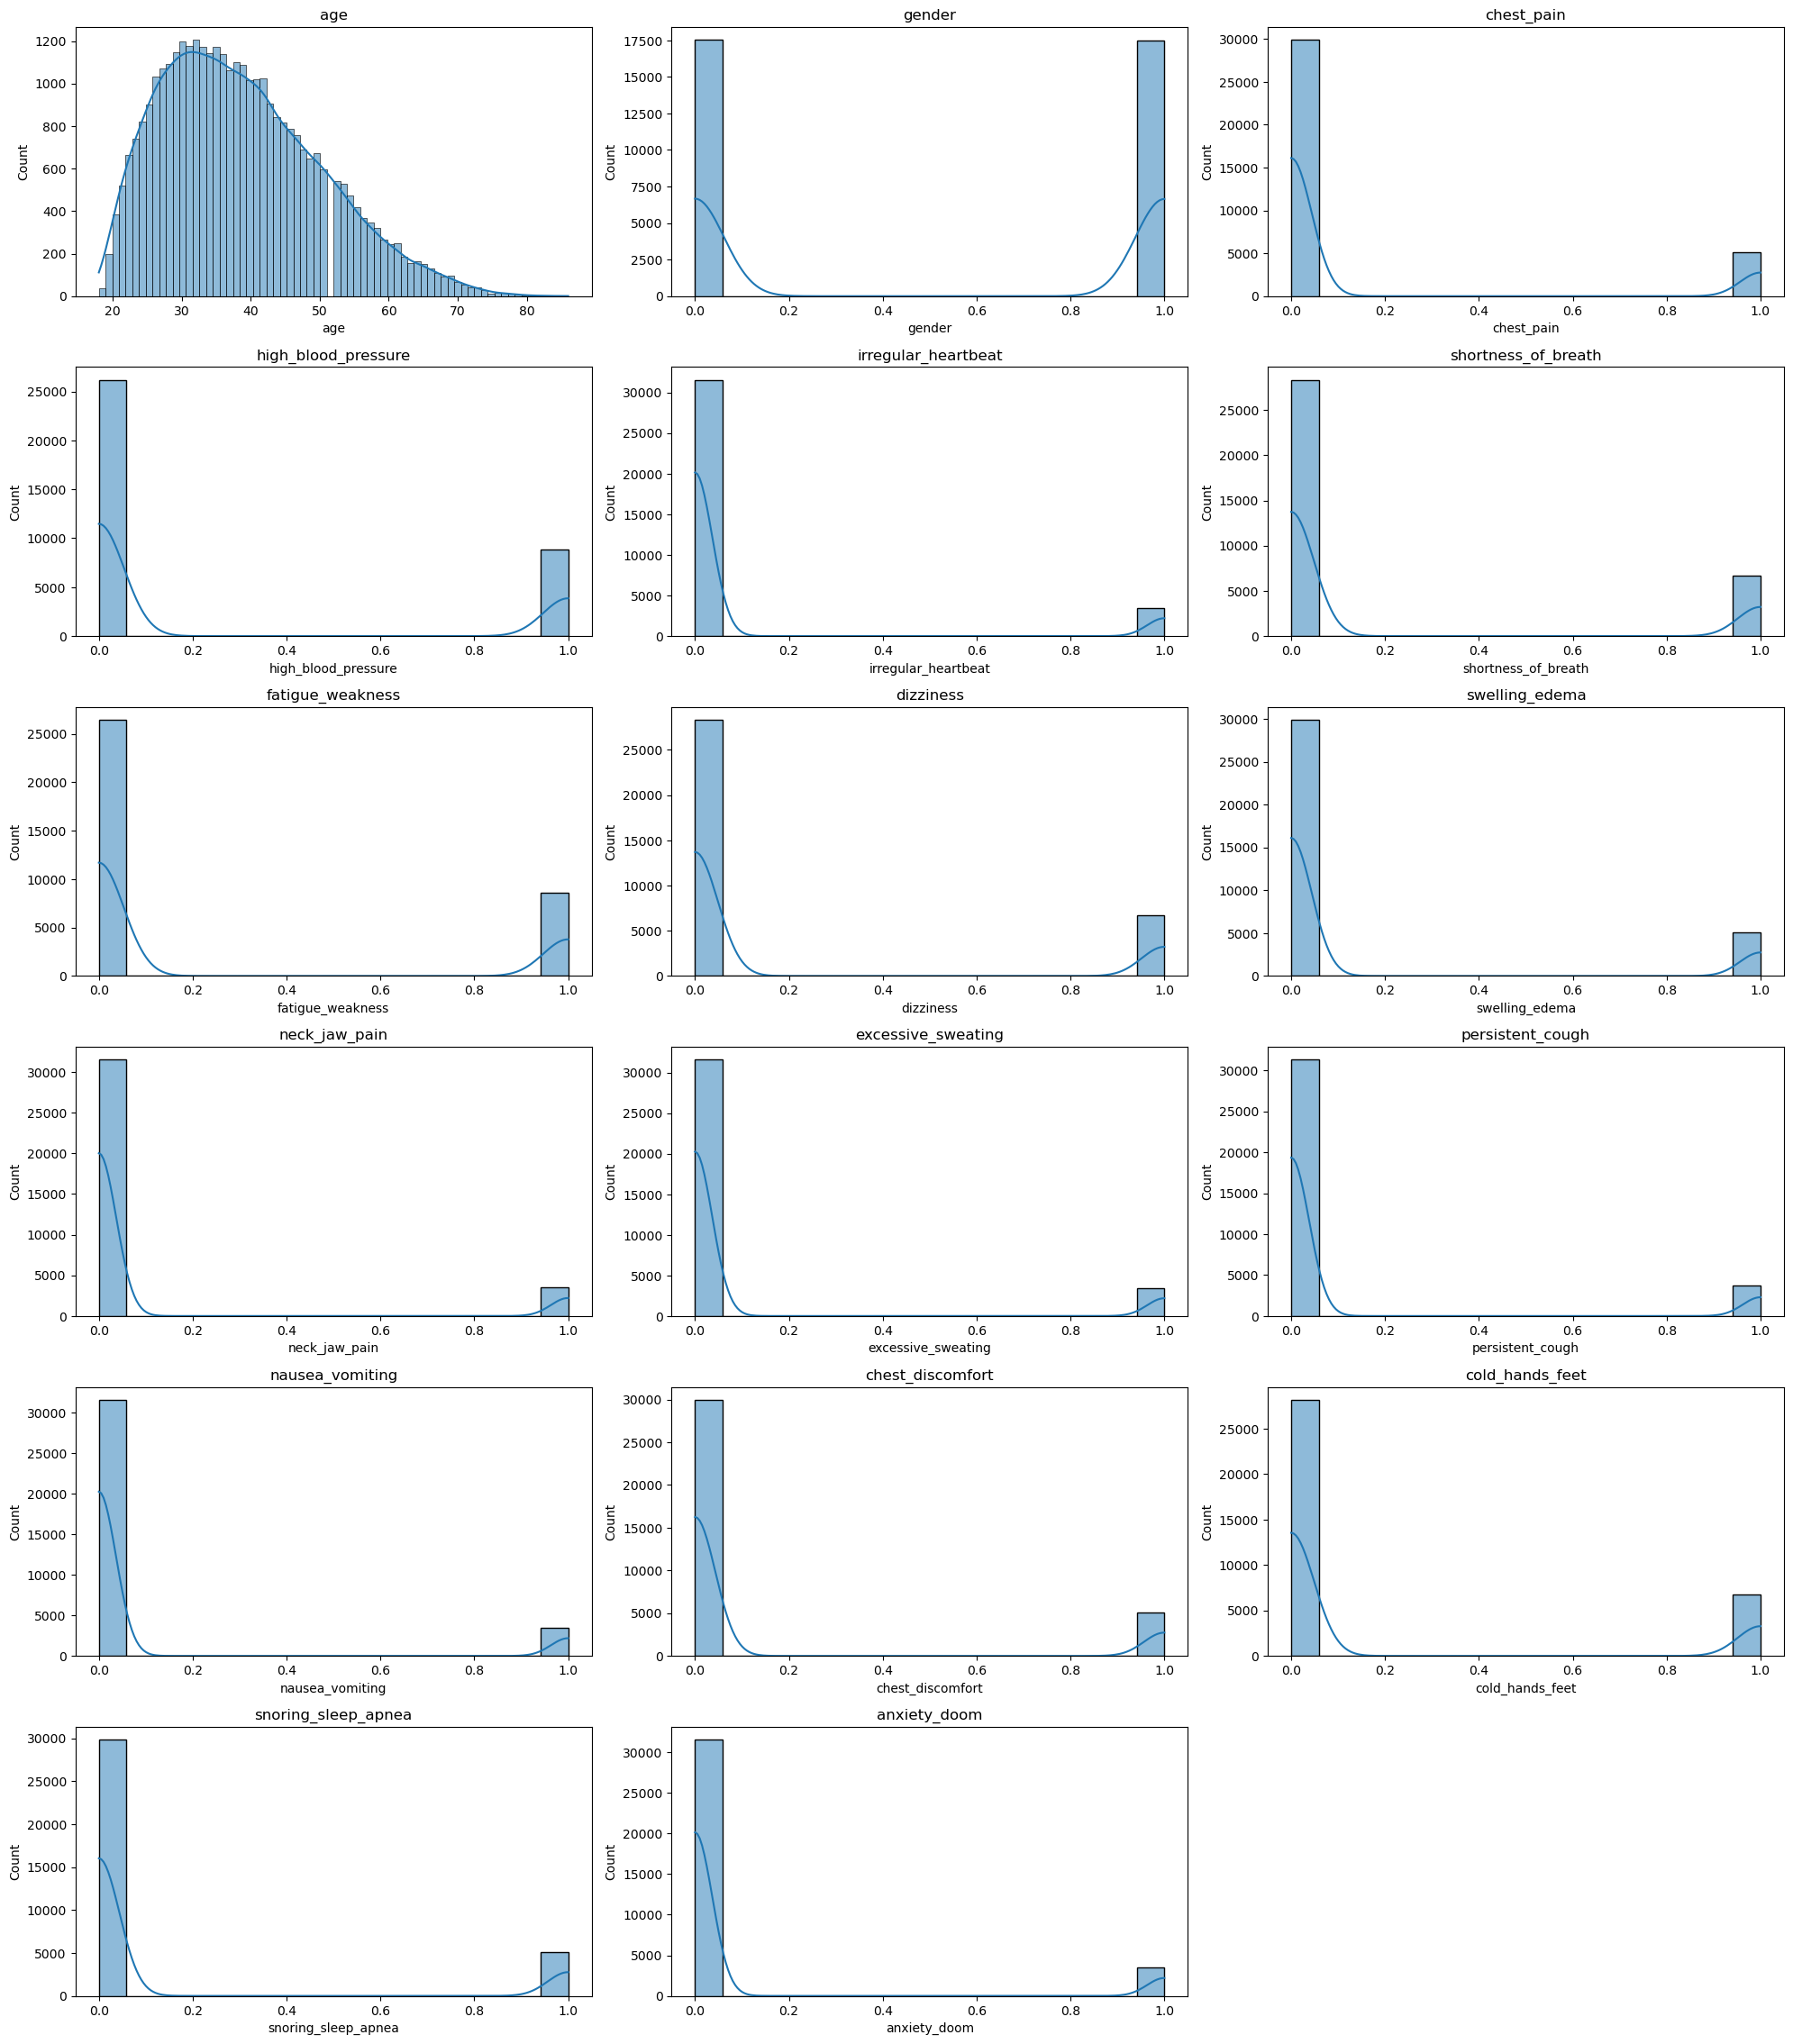

In [7]:
plt.figure(figsize=(20, 45))
for i in range(len(df.columns) - 1):
    plt.subplot(12, 3, i + 1)
    sns.histplot(df.iloc[:, i], kde=True)
    plt.title(df.columns[i])
plt.tight_layout()
plt.show()

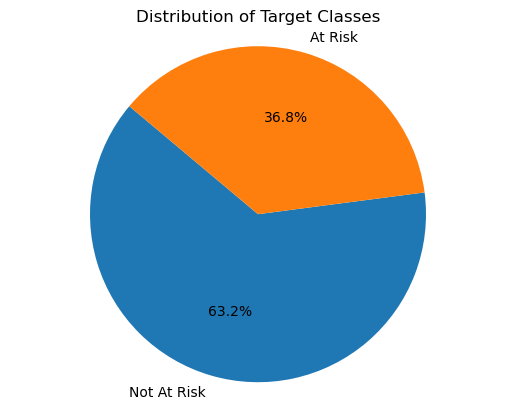

In [8]:
labels = ['Not At Risk', 'At Risk']
sizes = df['at_risk'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Classes')
plt.axis('equal')
plt.savefig('stroke_at_risk_status_pie_chart.png', dpi=300, bbox_inches='tight')
plt.show()

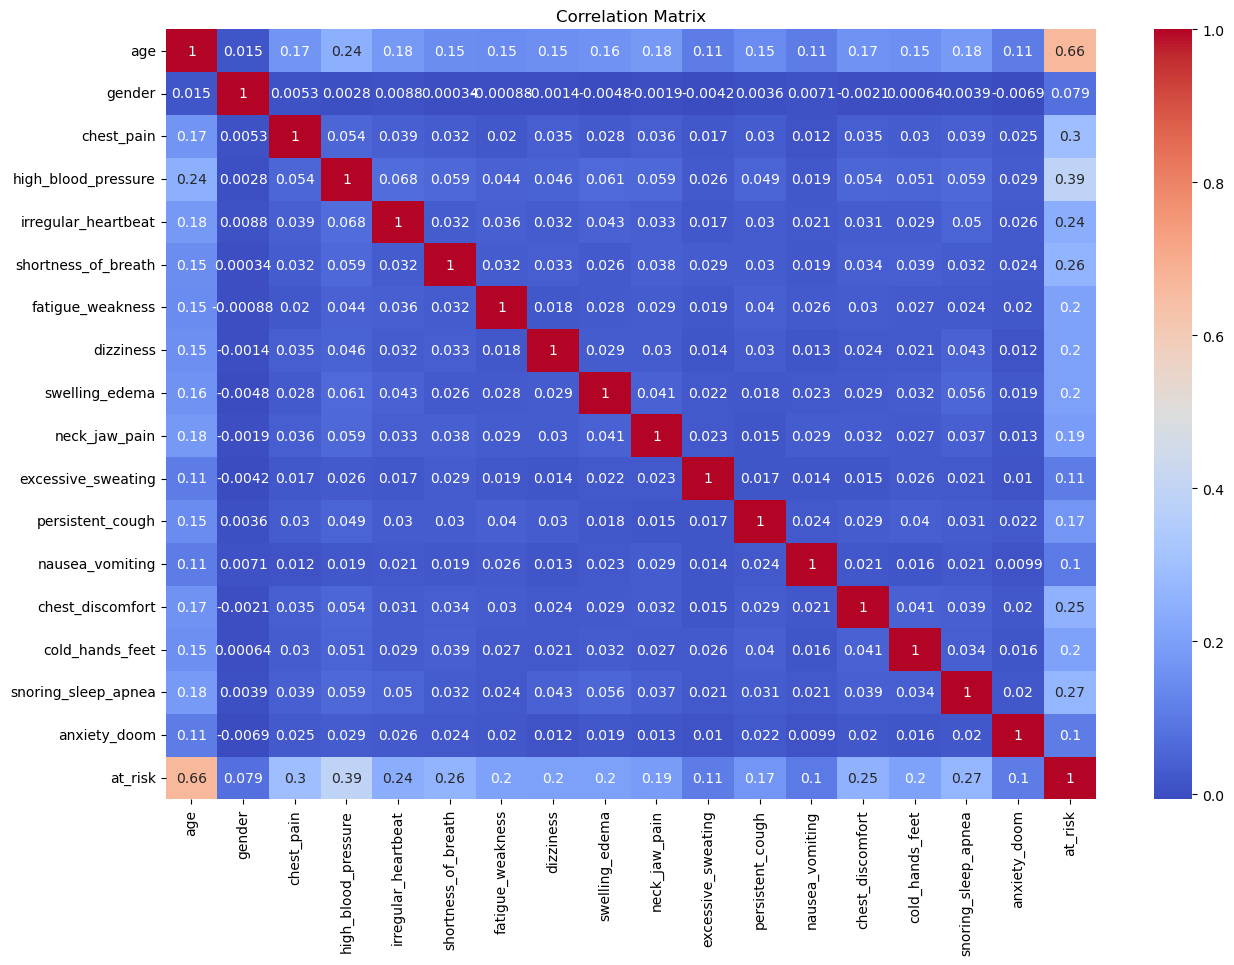

In [9]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.savefig('stroke_feature_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
# Train, Test , Validation Split
X = df.drop('at_risk', axis=1)
y = df['at_risk']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

### Model Training

In [11]:
# Define the algorithms
models = {
    "KNN": KNeighborsClassifier(n_jobs=-1),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1),
    "LightGBM": lgb.LGBMClassifier(random_state=42, n_jobs=-1),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

In [12]:
# Dataframe to store accuracy results
accuracy_no_parameter_tuning = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy'])

In [13]:
def evaluate_model(name, model):
    global accuracy_no_parameter_tuning  

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    val_acc = accuracy_score(y_val, y_pred_val)
    test_acc = accuracy_score(y_test, y_pred_test)

    accuracy_no_parameter_tuning = pd.concat([
        accuracy_no_parameter_tuning,
        pd.DataFrame([{
            'Model': name,
            'Train Accuracy': train_acc,
            'Validation Accuracy': val_acc,
            'Test Accuracy': test_acc
        }])
    ], ignore_index=True)

In [14]:
for name, model in models.items():
    evaluate_model(name, model)

/var/folders/d4/96_wt21102b8tyn51g2j_z6w0000gn/T/ipykernel_24036/228475192.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  accuracy_no_parameter_tuning = pd.concat([


[LightGBM] [Info] Number of positive: 10310, number of negative: 17690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 28000, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368214 -> initscore=-0.539885
[LightGBM] [Info] Start training from score -0.539885


In [15]:
# Accuracy results
print(accuracy_no_parameter_tuning)

                 Model  Train Accuracy  Validation Accuracy  Test Accuracy
0                  KNN        0.933036             0.912000       0.902857
1  Logistic Regression        0.981964             0.982571       0.977714
2        Decision Tree        1.000000             0.962571       0.963714
3        Random Forest        1.000000             0.973143       0.973429
4             AdaBoost        0.934500             0.935429       0.926857
5                  SVM        0.937286             0.935143       0.934857
6              XGBoost        0.999143             0.985714       0.988000
7             LightGBM        0.991750             0.982286       0.980571
8             CatBoost        0.999393             0.992000       0.992286


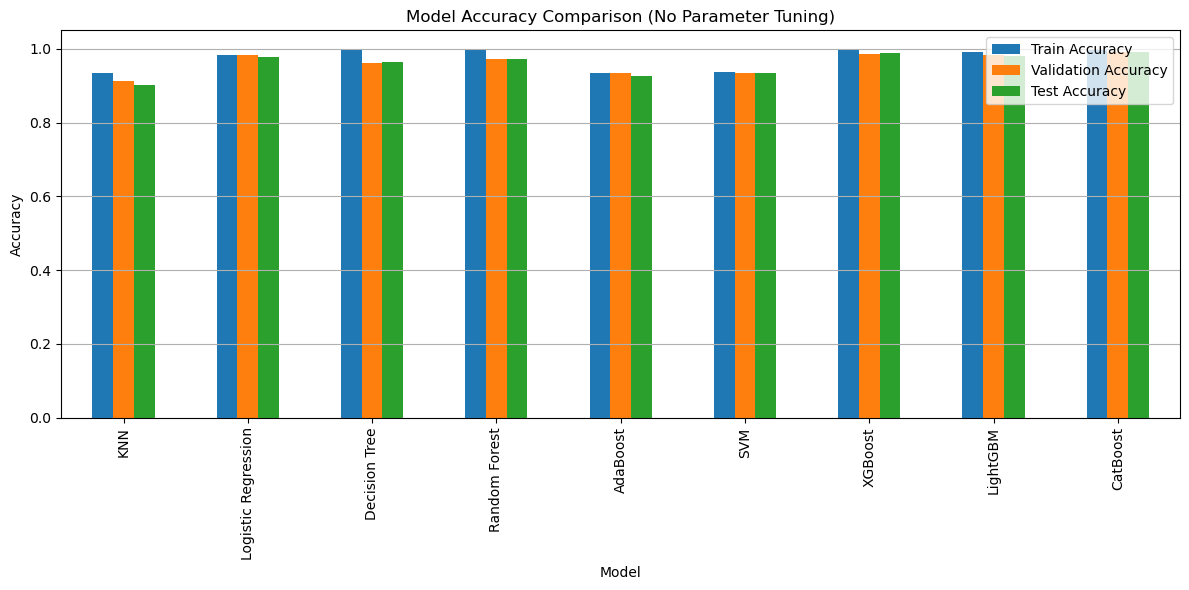

In [17]:
# Plotting Accuracy
df_plot = accuracy_no_parameter_tuning.set_index('Model')

df_plot.plot(kind='bar', figsize=(12, 6))
plt.title("Model Accuracy Comparison (No Parameter Tuning)")
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("accuracy_comparison_no_parameter_tuning.png", dpi=300)
plt.show()

In [18]:
# Feature Scaling 
scaler = MinMaxScaler()
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()
X_train_scaled['age'] = scaler.fit_transform(X_train[['age']])
X_val_scaled['age'] = scaler.transform(X_val[['age']])
X_test_scaled['age'] = scaler.transform(X_test[['age']])

In [19]:
X_train_scaled.head()

age  gender  chest_pain  high_blood_pressure  irregular_heartbeat  \
824    0.264706       1           1                    0                    0   
9991   0.235294       0           0                    0                    1   
7228   0.205882       1           0                    0                    0   
34097  0.250000       0           0                    0                    0   
15830  0.132353       0           0                    0                    0   

       shortness_of_breath  fatigue_weakness  dizziness  swelling_edema  \
824                      0                 1          0               0   
9991                     0                 1          1               0   
7228                     0                 0          1               0   
34097                    0                 1          0               0   
15830                    0                 0          0               0   

       neck_jaw_pain  excessive_sweating  persistent_cough  nausea_vomiting  \
824                0                   0                 0                0   
9991               0                   0                 0                0   
7228               0                   0                 0                0   
34097              0                   0                 0                0   
15830              0                   0                 0                0   

       chest_discomfort  cold_hands_feet  snoring_sleep_apnea  anxiety_doom  
824                   0                0                    0             0  
9991                  0                0                    0             0  
7228                  1                1                    0             0  
34097                 0                0                    0             0  
15830                 0                1                    0             0

In [20]:
# Dataframes to Store Performance Metrics
accuracy_train_test_validation = pd.DataFrame()
train_metrics = pd.DataFrame()
test_metrics = pd.DataFrame()
validation_metrics = pd.DataFrame()

## Model Training with Hyperparameter Tuning

#### KNN


In [21]:
# Define and fit GridSearchCV for KNN
param_grid_knn = {'n_neighbors': list(range(1, 10)), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
gs_knn = GridSearchCV(KNeighborsClassifier(n_jobs=-1), param_grid_knn, cv=5, n_jobs=-1)
gs_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [22]:
# Best model
best_knn = gs_knn.best_estimator_
model_name = 'KNN'

In [23]:
# Predict
y_train_pred = best_knn.predict(X_train_scaled)
y_val_pred = best_knn.predict(X_val_scaled)
y_test_pred = best_knn.predict(X_test_scaled)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Precision, Recall, F1
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

val_prec = precision_score(y_val, y_val_pred)
val_rec = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

In [28]:
# Append to DataFrames
accuracy_train_test_validation = pd.concat([accuracy_train_test_validation, pd.DataFrame([{
        'Model': model_name,
        'Train Accuracy': train_acc,
        'Validation Accuracy': val_acc,
        'Test Accuracy': test_acc
    }])], ignore_index=True)

train_metrics = pd.concat([train_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': train_acc,
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1 Score': f1_score(y_train, y_train_pred)
    }])], ignore_index=True)

validation_metrics = pd.concat([validation_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': val_acc,
        'Precision': precision_score(y_val, y_val_pred),
        'Recall': recall_score(y_val, y_val_pred),
        'F1 Score': f1_score(y_val, y_val_pred)
    }])], ignore_index=True)

test_metrics = pd.concat([test_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': test_acc,
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred)
    }])], ignore_index=True)

In [29]:
# Print best parameters and classification report
print("Best KNN Params:", gs_knn.best_params_)
print("\nClassification Report (Test Set):\n")
print(classification_report(y_test, y_test_pred))

Best KNN Params: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2212
           1       0.96      0.93      0.95      1288

    accuracy                           0.96      3500
   macro avg       0.96      0.96      0.96      3500
weighted avg       0.96      0.96      0.96      3500



In [30]:
print(train_metrics)
print(test_metrics)
print(validation_metrics)

  Model  Accuracy  Precision  Recall  F1 Score
0   KNN       1.0        1.0     1.0       1.0
  Model  Accuracy  Precision    Recall  F1 Score
0   KNN  0.961714    0.96234  0.932453  0.947161
  Model  Accuracy  Precision    Recall  F1 Score
0   KNN  0.962286   0.959492  0.937161  0.948195


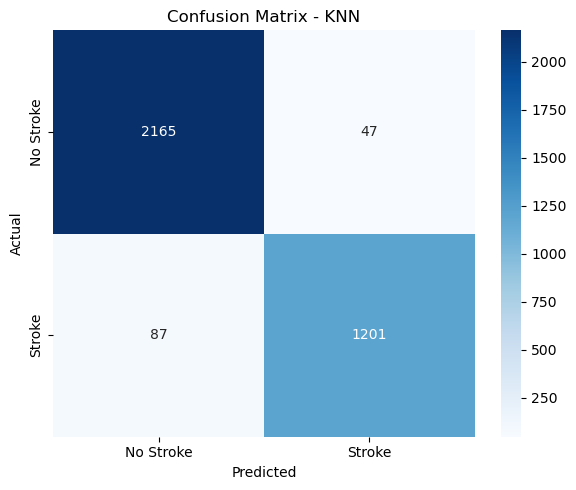

In [31]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title(f'Confusion Matrix - {model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig("KNN_tuned_confusion_matrix.png", dpi=300)
plt.show()

#### Logistic Regression

In [32]:
# Define and fit GridSearchCV for Logistic Regression
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['liblinear']}
gs_lr = GridSearchCV(LogisticRegression(n_jobs=-1, random_state=42), param_grid_lr, cv=5, n_jobs=-1)
gs_lr.fit(X_train_scaled, y_train)

/Users/rabiulislam/Documents/North_South_University/Spring_2025/CSE_445/Project/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/rabiulislam/Documents/North_South_University/Spring_2025/CSE_445/Project/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/rabiulislam/Documents/North_South_University/Spring_2025/CSE_445/Project/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/rabiulislam/Documents/North_South_University/Spring_2025/CSE_445/Project/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_job

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['liblinear']})

In [33]:
# Best model
best_lr = gs_lr.best_estimator_
model_name = 'Logistic Regression'

In [34]:
# Predict
y_train_pred = best_lr.predict(X_train_scaled)
y_val_pred = best_lr.predict(X_val_scaled)
y_test_pred = best_lr.predict(X_test_scaled)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Precision, Recall, F1
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

val_prec = precision_score(y_val, y_val_pred)
val_rec = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

In [35]:
# Append to DataFrames
accuracy_train_test_validation = pd.concat([accuracy_train_test_validation, pd.DataFrame([{
        'Model': model_name,
        'Train Accuracy': train_acc,
        'Validation Accuracy': val_acc,
        'Test Accuracy': test_acc
    }])], ignore_index=True)

train_metrics = pd.concat([train_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': train_acc,
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1 Score': f1_score(y_train, y_train_pred)
    }])], ignore_index=True)

validation_metrics = pd.concat([validation_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': val_acc,
        'Precision': precision_score(y_val, y_val_pred),
        'Recall': recall_score(y_val, y_val_pred),
        'F1 Score': f1_score(y_val, y_val_pred)
    }])], ignore_index=True)

test_metrics = pd.concat([test_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': test_acc,
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred)
    }])], ignore_index=True)

In [36]:
# Print best parameters and classification report
print("Best Logistic Regression Params:", gs_lr.best_params_)
print("\nClassification Report (Test Set):\n")
print(classification_report(y_test, y_test_pred))

Best Logistic Regression Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2212
           1       0.96      0.97      0.97      1288

    accuracy                           0.98      3500
   macro avg       0.97      0.98      0.98      3500
weighted avg       0.98      0.98      0.98      3500



In [37]:
print(train_metrics)
print(test_metrics)
print(validation_metrics)

                 Model  Accuracy  Precision    Recall  F1 Score
0                  KNN  1.000000   1.000000  1.000000  1.000000
1  Logistic Regression  0.981893   0.976939  0.973812  0.975373
                 Model  Accuracy  Precision    Recall  F1 Score
0                  KNN  0.961714   0.962340  0.932453  0.947161
1  Logistic Regression  0.977429   0.964643  0.974379  0.969486
                 Model  Accuracy  Precision    Recall  F1 Score
0                  KNN  0.962286   0.959492  0.937161  0.948195
1  Logistic Regression  0.982286   0.973015  0.979054  0.976025


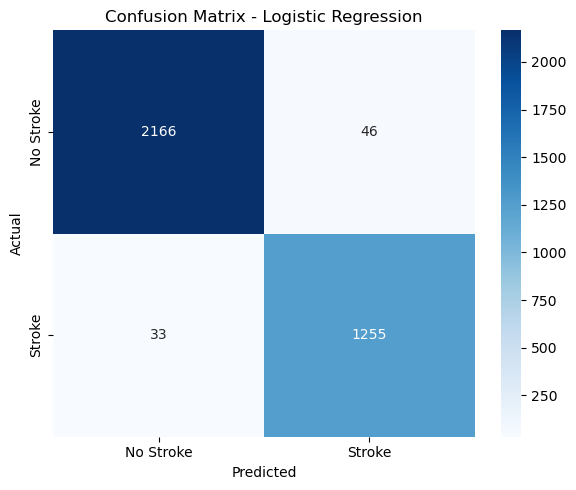

In [38]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title(f'Confusion Matrix - {model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig("Logistic_Regression_tuned_confusion_matrix.png", dpi=300)
plt.show()

#### Decision Tree

In [40]:
# Define and fit GridSearchCV for Decision Tree
param_grid_dt = {'max_depth': [3, 5, 10, 15], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']}
gs_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, n_jobs=-1)
gs_dt.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15],
                         'min_samples_split': [2, 5, 10]})

In [41]:
# Best model
best_dt = gs_dt.best_estimator_
model_name = 'Decision Tree'

In [42]:
# Predict
y_train_pred = best_dt.predict(X_train_scaled)
y_val_pred = best_dt.predict(X_val_scaled)
y_test_pred = best_dt.predict(X_test_scaled)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Precision, Recall, F1
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

val_prec = precision_score(y_val, y_val_pred)
val_rec = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

In [43]:
# Append to DataFrames
accuracy_train_test_validation = pd.concat([accuracy_train_test_validation, pd.DataFrame([{
        'Model': model_name,
        'Train Accuracy': train_acc,
        'Validation Accuracy': val_acc,
        'Test Accuracy': test_acc
    }])], ignore_index=True)

train_metrics = pd.concat([train_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': train_acc,
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1 Score': f1_score(y_train, y_train_pred)
    }])], ignore_index=True)

validation_metrics = pd.concat([validation_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': val_acc,
        'Precision': precision_score(y_val, y_val_pred),
        'Recall': recall_score(y_val, y_val_pred),
        'F1 Score': f1_score(y_val, y_val_pred)
    }])], ignore_index=True)

test_metrics = pd.concat([test_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': test_acc,
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred)
    }])], ignore_index=True)

In [44]:
# Print best parameters and classification report
print("Best Decision Tree Params:", gs_dt.best_params_)
print("\nClassification Report (Test Set):\n")
print(classification_report(y_test, y_test_pred))

Best Decision Tree Params: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2}

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2212
           1       0.96      0.92      0.94      1288

    accuracy                           0.96      3500
   macro avg       0.96      0.95      0.95      3500
weighted avg       0.96      0.96      0.95      3500



In [45]:
print(train_metrics)
print(test_metrics)
print(validation_metrics)

                 Model  Accuracy  Precision    Recall  F1 Score
0                  KNN  1.000000   1.000000  1.000000  1.000000
1  Logistic Regression  0.981893   0.976939  0.973812  0.975373
2        Decision Tree  0.988679   0.996325  0.972842  0.984443
                 Model  Accuracy  Precision    Recall  F1 Score
0                  KNN  0.961714   0.962340  0.932453  0.947161
1  Logistic Regression  0.977429   0.964643  0.974379  0.969486
2        Decision Tree  0.955143   0.958637  0.917702  0.937723
                 Model  Accuracy  Precision    Recall  F1 Score
0                  KNN  0.962286   0.959492  0.937161  0.948195
1  Logistic Regression  0.982286   0.973015  0.979054  0.976025
2        Decision Tree  0.952571   0.961380  0.907680  0.933759


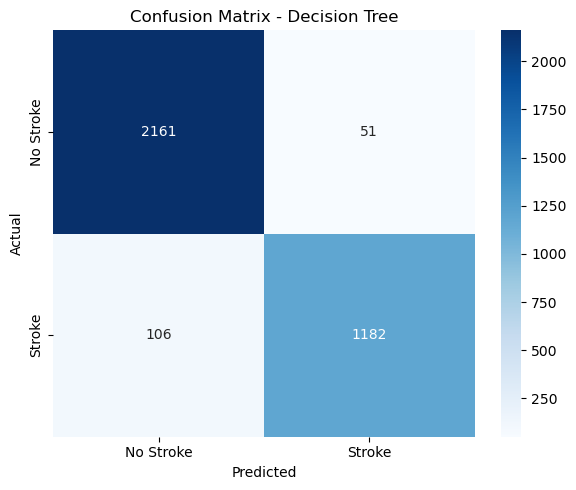

In [46]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title(f'Confusion Matrix - {model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig("Decision_Tree_tuned_confusion_matrix.png", dpi=300)
plt.show()

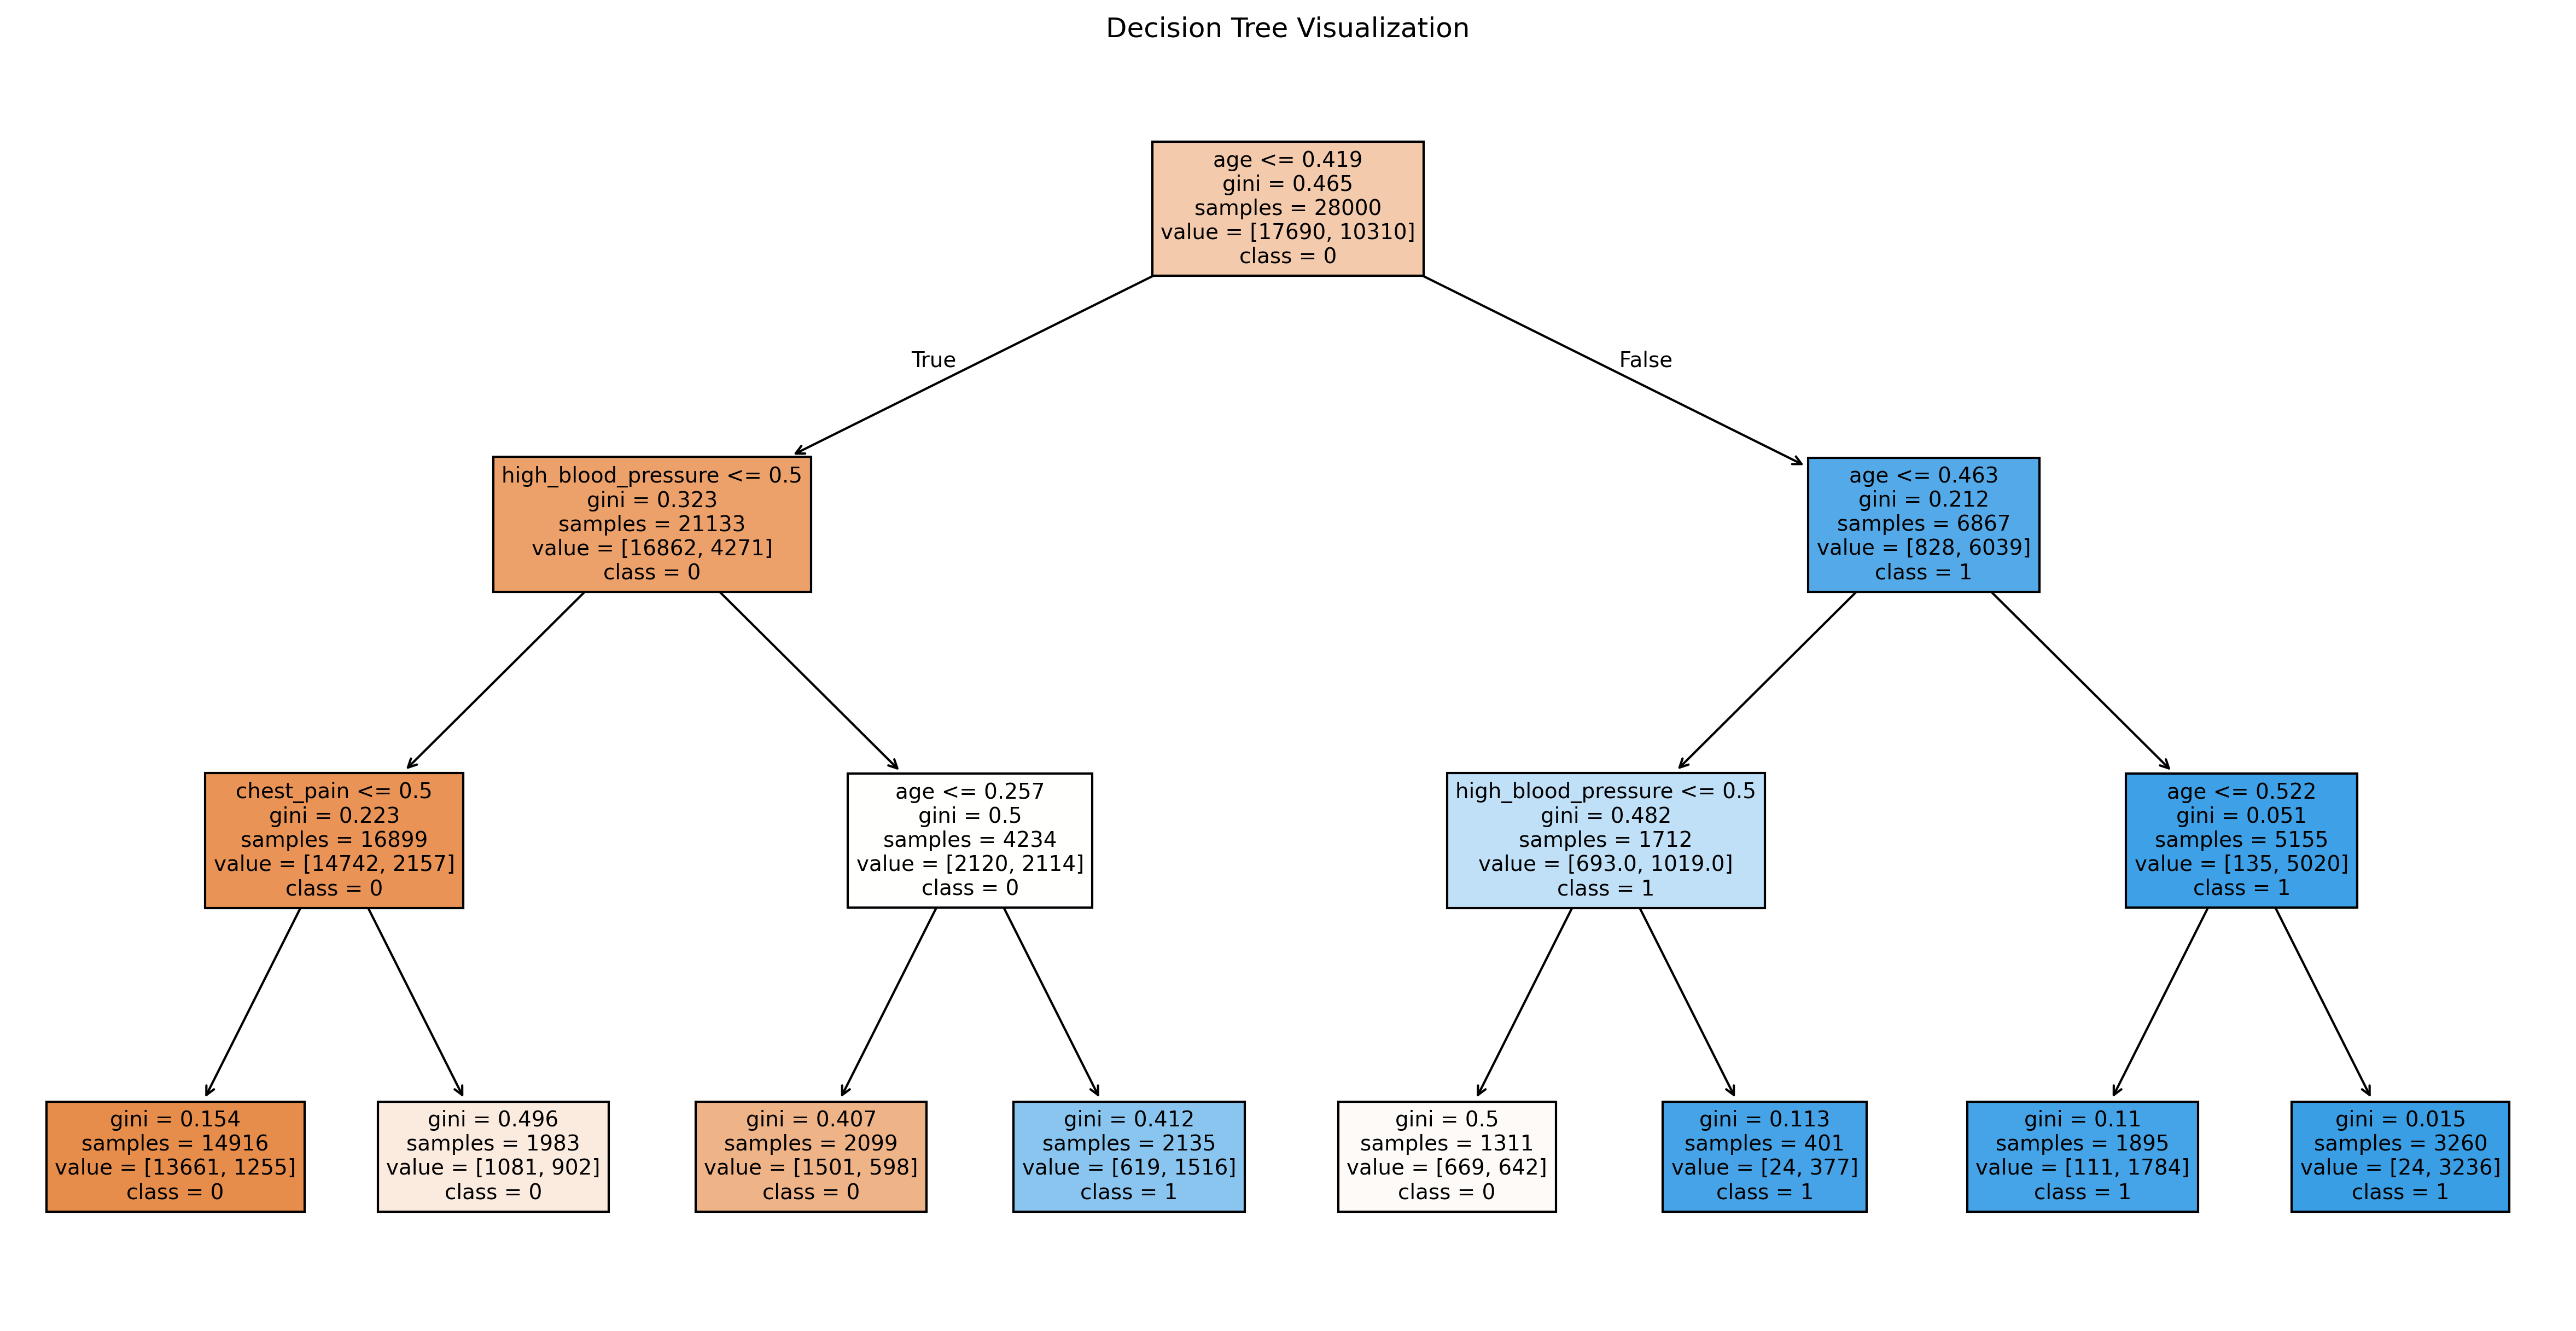

In [60]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Fit the decision tree model
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train_scaled, y_train)

# Set a larger figure size and high DPI for better resolution
plt.figure(figsize=(20, 10), dpi=300)
plot_tree(dt, feature_names=X_train_scaled.columns, class_names=['0', '1'], filled=True)
plt.title("Decision Tree Visualization")
plt.savefig("Decision_Tree_Visualization.png", dpi=300)
plt.show()


In [61]:
print(accuracy_train_test_validation)

                 Model  Train Accuracy  Validation Accuracy  Test Accuracy
0                  KNN        1.000000             0.962286       0.961714
1  Logistic Regression        0.981893             0.982286       0.977429
2        Decision Tree        0.988679             0.952571       0.955143


#### Random Forest

In [62]:
# Define and fit GridSearchCV for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200, 500, 1000], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5], 'bootstrap': [True, False]}
gs_rf = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), param_grid_rf, cv=5, n_jobs=-1)
gs_rf.fit(X_train_scaled, y_train)

/Users/rabiulislam/Documents/North_South_University/Spring_2025/CSE_445/Project/env/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200, 500, 1000]})

In [63]:
# Best model
best_rf = gs_rf.best_estimator_
model_name = 'Random Forest'

In [64]:
# Predict
y_train_pred = best_rf.predict(X_train_scaled)
y_val_pred = best_rf.predict(X_val_scaled)
y_test_pred = best_rf.predict(X_test_scaled)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Precision, Recall, F1
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

val_prec = precision_score(y_val, y_val_pred)
val_rec = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

In [65]:
# Append to DataFrames
accuracy_train_test_validation = pd.concat([accuracy_train_test_validation, pd.DataFrame([{
        'Model': model_name,
        'Train Accuracy': train_acc,
        'Validation Accuracy': val_acc,
        'Test Accuracy': test_acc
    }])], ignore_index=True)

train_metrics = pd.concat([train_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': train_acc,
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1 Score': f1_score(y_train, y_train_pred)
    }])], ignore_index=True)

validation_metrics = pd.concat([validation_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': val_acc,
        'Precision': precision_score(y_val, y_val_pred),
        'Recall': recall_score(y_val, y_val_pred),
        'F1 Score': f1_score(y_val, y_val_pred)
    }])], ignore_index=True)

test_metrics = pd.concat([test_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': test_acc,
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred)
    }])], ignore_index=True)

In [66]:
# Print best parameters and classification report
print("Best Random Forest Params:", gs_rf.best_params_)
print("\nClassification Report (Test Set):\n")
print(classification_report(y_test, y_test_pred))

Best Random Forest Params: {'bootstrap': False, 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 1000}

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2212
           1       0.98      0.96      0.97      1288

    accuracy                           0.98      3500
   macro avg       0.98      0.97      0.98      3500
weighted avg       0.98      0.98      0.98      3500



In [67]:
print(train_metrics)
print(test_metrics)
print(validation_metrics)

                 Model  Accuracy  Precision    Recall  F1 Score
0                  KNN  1.000000   1.000000  1.000000  1.000000
1  Logistic Regression  0.981893   0.976939  0.973812  0.975373
2        Decision Tree  0.988679   0.996325  0.972842  0.984443
3        Random Forest  0.999821   0.999612  0.999903  0.999758
                 Model  Accuracy  Precision    Recall  F1 Score
0                  KNN  0.961714   0.962340  0.932453  0.947161
1  Logistic Regression  0.977429   0.964643  0.974379  0.969486
2        Decision Tree  0.955143   0.958637  0.917702  0.937723
3        Random Forest  0.977714   0.979398  0.959627  0.969412
                 Model  Accuracy  Precision    Recall  F1 Score
0                  KNN  0.962286   0.959492  0.937161  0.948195
1  Logistic Regression  0.982286   0.973015  0.979054  0.976025
2        Decision Tree  0.952571   0.961380  0.907680  0.933759
3        Random Forest  0.976000   0.979316  0.955004  0.967007


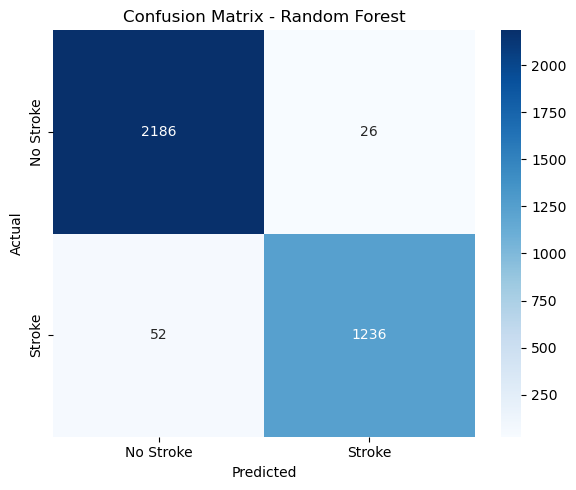

In [68]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title(f'Confusion Matrix - {model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig("Random_Forest_tuned_confusion_matrix.png", dpi=300)
plt.show()

#### AdaBoost

In [69]:
# Define and fit GridSearchCV for AdaBoost
param_grid_ada = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1]}
gs_ada = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid_ada, cv=5, n_jobs=-1)
gs_ada.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 150]})

In [70]:
# Best model
best_ada = gs_ada.best_estimator_
model_name = 'AdaBoost'

In [71]:
# Predict
y_train_pred = best_ada.predict(X_train_scaled)
y_val_pred = best_ada.predict(X_val_scaled)
y_test_pred = best_ada.predict(X_test_scaled)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Precision, Recall, F1
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

val_prec = precision_score(y_val, y_val_pred)
val_rec = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

In [72]:
# Append to DataFrames
accuracy_train_test_validation = pd.concat([accuracy_train_test_validation, pd.DataFrame([{
        'Model': model_name,
        'Train Accuracy': train_acc,
        'Validation Accuracy': val_acc,
        'Test Accuracy': test_acc
    }])], ignore_index=True)

train_metrics = pd.concat([train_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': train_acc,
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1 Score': f1_score(y_train, y_train_pred)
    }])], ignore_index=True)

validation_metrics = pd.concat([validation_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': val_acc,
        'Precision': precision_score(y_val, y_val_pred),
        'Recall': recall_score(y_val, y_val_pred),
        'F1 Score': f1_score(y_val, y_val_pred)
    }])], ignore_index=True)

test_metrics = pd.concat([test_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': test_acc,
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred)
    }])], ignore_index=True)

In [73]:
# Print best parameters and classification report
print("Best AdaBoost Params:", gs_ada.best_params_)
print("\nClassification Report (Test Set):\n")
print(classification_report(y_test, y_test_pred))

Best AdaBoost Params: {'learning_rate': 1, 'n_estimators': 150}

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2212
           1       0.97      0.92      0.95      1288

    accuracy                           0.96      3500
   macro avg       0.96      0.95      0.96      3500
weighted avg       0.96      0.96      0.96      3500



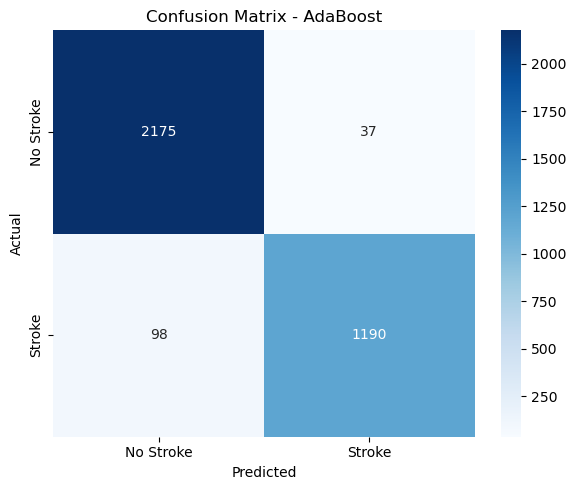

In [74]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title(f'Confusion Matrix - {model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig("AdaBoost_tuned_confusion_matrix.png", dpi=300)
plt.show()

#### XGBoost

In [75]:
# Define and fit GridSearchCV for XGBoost
param_grid_xgb = {'n_estimators': [50, 100, 200, 500, 1000], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 1]}
gs_xgb = GridSearchCV(xgb.XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1), param_grid_xgb, cv=5, n_jobs=-1)
gs_xgb.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200, 500, 1000]})

In [76]:
# Best model
best_xgb = gs_xgb.best_estimator_
model_name = 'XGBoost'

In [77]:
# Predict
y_train_pred = best_xgb.predict(X_train_scaled)
y_val_pred = best_xgb.predict(X_val_scaled)
y_test_pred = best_xgb.predict(X_test_scaled)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Precision, Recall, F1
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

val_prec = precision_score(y_val, y_val_pred)
val_rec = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

In [78]:
# Append to DataFrames
accuracy_train_test_validation = pd.concat([accuracy_train_test_validation, pd.DataFrame([{
        'Model': model_name,
        'Train Accuracy': train_acc,
        'Validation Accuracy': val_acc,
        'Test Accuracy': test_acc
    }])], ignore_index=True)

train_metrics = pd.concat([train_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': train_acc,
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1 Score': f1_score(y_train, y_train_pred)
    }])], ignore_index=True)

validation_metrics = pd.concat([validation_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': val_acc,
        'Precision': precision_score(y_val, y_val_pred),
        'Recall': recall_score(y_val, y_val_pred),
        'F1 Score': f1_score(y_val, y_val_pred)
    }])], ignore_index=True)

test_metrics = pd.concat([test_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': test_acc,
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred)
    }])], ignore_index=True)

In [79]:
# Print best parameters and classification report
print("Best XGBoost Params:", gs_xgb.best_params_)
print("\nClassification Report (Test Set):\n")
print(classification_report(y_test, y_test_pred))

Best XGBoost Params: {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 1000}

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2212
           1       1.00      1.00      1.00      1288

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500



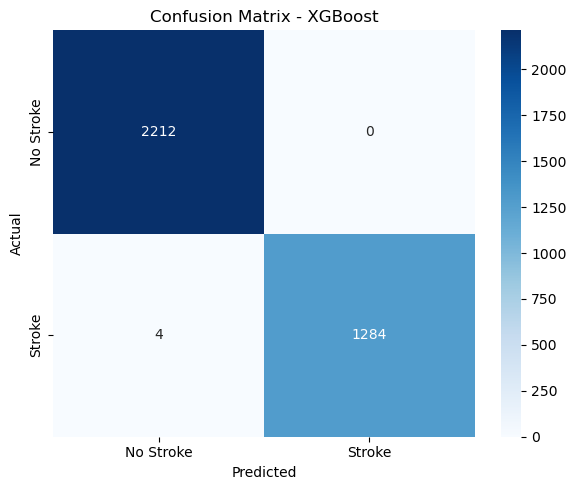

In [80]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title(f'Confusion Matrix - {model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig("XGBoost_tuned_confusion_matrix.png", dpi=300)
plt.show()

In [81]:
print(train_metrics)
print(test_metrics)
print(validation_metrics)

                 Model  Accuracy  Precision    Recall  F1 Score
0                  KNN  1.000000   1.000000  1.000000  1.000000
1  Logistic Regression  0.981893   0.976939  0.973812  0.975373
2        Decision Tree  0.988679   0.996325  0.972842  0.984443
3        Random Forest  0.999821   0.999612  0.999903  0.999758
4             AdaBoost  0.967250   0.975306  0.934724  0.954584
5              XGBoost  1.000000   1.000000  1.000000  1.000000
                 Model  Accuracy  Precision    Recall  F1 Score
0                  KNN  0.961714   0.962340  0.932453  0.947161
1  Logistic Regression  0.977429   0.964643  0.974379  0.969486
2        Decision Tree  0.955143   0.958637  0.917702  0.937723
3        Random Forest  0.977714   0.979398  0.959627  0.969412
4             AdaBoost  0.961429   0.969845  0.923913  0.946322
5              XGBoost  0.998857   1.000000  0.996894  0.998445
                 Model  Accuracy  Precision    Recall  F1 Score
0                  KNN  0.962286   0.959

#### LightGBM

In [82]:
# Define and fit GridSearchCV for XGBoost
param_grid_lgb = {'n_estimators': [50, 100, 200, 500, 1000], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 1]}
gs_lgb = GridSearchCV(lgb.LGBMClassifier(random_state=42, n_jobs=-1), param_grid_lgb, cv=5, n_jobs=-1)
gs_lgb.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 8248, number of negative: 14152
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 22400, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368214 -> initscore=-0.539885
[LightGBM] [Info] Start training from score -0.539885
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

GridSearchCV(cv=5, estimator=LGBMClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200, 500, 1000]})

In [83]:
# Best model
best_lgb = gs_lgb.best_estimator_
model_name = 'LightGBM'

In [84]:
# Predict
y_train_pred = best_lgb.predict(X_train_scaled)
y_val_pred = best_lgb.predict(X_val_scaled)
y_test_pred = best_lgb.predict(X_test_scaled)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Precision, Recall, F1
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

val_prec = precision_score(y_val, y_val_pred)
val_rec = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

In [85]:
# Append to DataFrames
accuracy_train_test_validation = pd.concat([accuracy_train_test_validation, pd.DataFrame([{
        'Model': model_name,
        'Train Accuracy': train_acc,
        'Validation Accuracy': val_acc,
        'Test Accuracy': test_acc
    }])], ignore_index=True)

train_metrics = pd.concat([train_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': train_acc,
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1 Score': f1_score(y_train, y_train_pred)
    }])], ignore_index=True)

validation_metrics = pd.concat([validation_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': val_acc,
        'Precision': precision_score(y_val, y_val_pred),
        'Recall': recall_score(y_val, y_val_pred),
        'F1 Score': f1_score(y_val, y_val_pred)
    }])], ignore_index=True)

test_metrics = pd.concat([test_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': test_acc,
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred)
    }])], ignore_index=True)

In [86]:
# Print best parameters and classification report
print("Best LightGBM Params:", gs_lgb.best_params_)
print("\nClassification Report (Test Set):\n")
print(classification_report(y_test, y_test_pred))

Best LightGBM Params: {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 1000}

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2212
           1       1.00      1.00      1.00      1288

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500



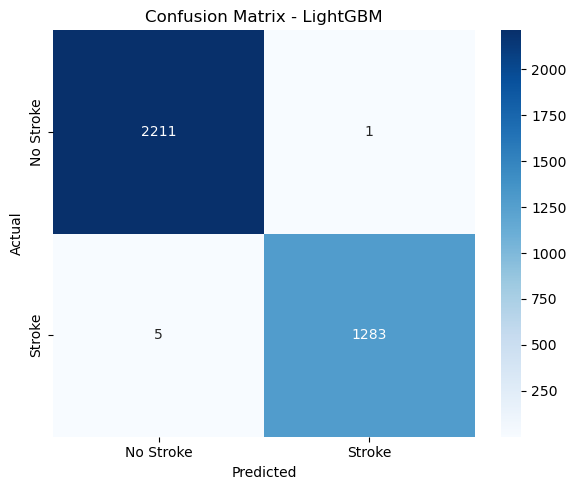


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [87]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title(f'Confusion Matrix - {model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig("LightGBM_tuned_confusion_matrix.png", dpi=300)
plt.show()

#### CatBoost

In [88]:
# Define and fit GridSearchCV for CatBoost
param_grid_cat = {'iterations': [50, 100, 200, 500, 1000], 'depth': [4, 6, 10], 'learning_rate': [0.01, 0.1, 1]}
gs_cat = GridSearchCV(CatBoostClassifier(verbose=0, random_state=42), param_grid_cat, cv=5, n_jobs=-1)
gs_cat.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x15e16ac10>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 10],
                         'iterations': [50, 100, 200, 500, 1000],
                         'learning_rate': [0.01, 0.1, 1]})

In [89]:
# Best model
best_cat = gs_cat.best_estimator_
model_name = 'CatBoost'

In [90]:
# Predict
y_train_pred = best_cat.predict(X_train_scaled)
y_val_pred = best_cat.predict(X_val_scaled)
y_test_pred = best_cat.predict(X_test_scaled)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Precision, Recall, F1
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

val_prec = precision_score(y_val, y_val_pred)
val_rec = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

In [91]:
# Append to DataFrames
accuracy_train_test_validation = pd.concat([accuracy_train_test_validation, pd.DataFrame([{
        'Model': model_name,
        'Train Accuracy': train_acc,
        'Validation Accuracy': val_acc,
        'Test Accuracy': test_acc
    }])], ignore_index=True)

train_metrics = pd.concat([train_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': train_acc,
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1 Score': f1_score(y_train, y_train_pred)
    }])], ignore_index=True)

validation_metrics = pd.concat([validation_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': val_acc,
        'Precision': precision_score(y_val, y_val_pred),
        'Recall': recall_score(y_val, y_val_pred),
        'F1 Score': f1_score(y_val, y_val_pred)
    }])], ignore_index=True)

test_metrics = pd.concat([test_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': test_acc,
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred)
    }])], ignore_index=True)

In [92]:
# Print best parameters and classification report
print("Best CatBoost Params:", gs_cat.best_params_)
print("\nClassification Report (Test Set):\n")
print(classification_report(y_test, y_test_pred))

Best CatBoost Params: {'depth': 4, 'iterations': 500, 'learning_rate': 1}

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2212
           1       1.00      1.00      1.00      1288

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500



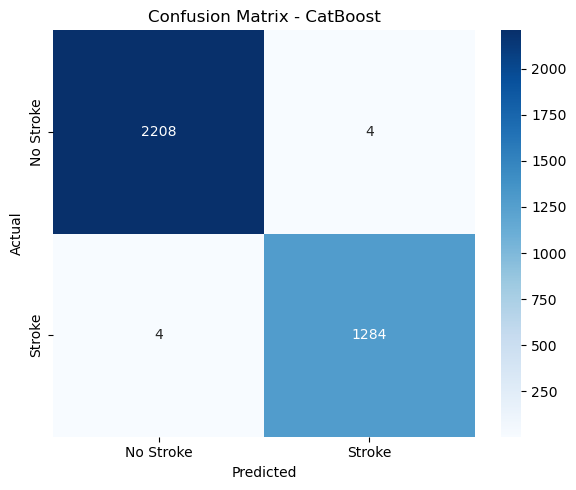

In [93]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title(f'Confusion Matrix - {model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig("CatBoost_tuned_confusion_matrix.png", dpi=300)
plt.show()

#### SVM

In [94]:
# Define and fit GridSearchCV for SVM
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
gs_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svm, cv=5, n_jobs=-1)
gs_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [95]:
# Best model
best_svm = gs_svm.best_estimator_
model_name = 'SVM'

In [96]:
# Predict
y_train_pred = best_svm.predict(X_train_scaled)
y_val_pred = best_svm.predict(X_val_scaled)
y_test_pred = best_svm.predict(X_test_scaled)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Precision, Recall, F1
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

val_prec = precision_score(y_val, y_val_pred)
val_rec = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

In [97]:
# Append to DataFrames
accuracy_train_test_validation = pd.concat([accuracy_train_test_validation, pd.DataFrame([{
        'Model': model_name,
        'Train Accuracy': train_acc,
        'Validation Accuracy': val_acc,
        'Test Accuracy': test_acc
    }])], ignore_index=True)

train_metrics = pd.concat([train_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': train_acc,
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1 Score': f1_score(y_train, y_train_pred)
    }])], ignore_index=True)

validation_metrics = pd.concat([validation_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': val_acc,
        'Precision': precision_score(y_val, y_val_pred),
        'Recall': recall_score(y_val, y_val_pred),
        'F1 Score': f1_score(y_val, y_val_pred)
    }])], ignore_index=True)

test_metrics = pd.concat([test_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': test_acc,
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred)
    }])], ignore_index=True)

In [98]:
# Print best parameters and classification report
print("Best SVM Params:", gs_svm.best_params_)
print("\nClassification Report (Test Set):\n")
print(classification_report(y_test, y_test_pred))

Best SVM Params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2212
           1       0.98      0.98      0.98      1288

    accuracy                           0.99      3500
   macro avg       0.98      0.98      0.98      3500
weighted avg       0.99      0.99      0.99      3500



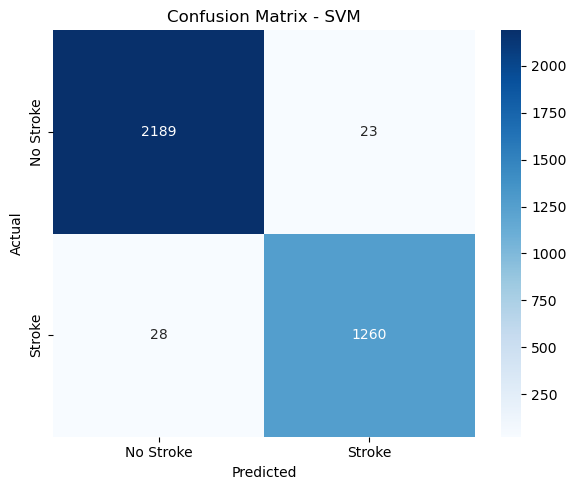

In [99]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title(f'Confusion Matrix - {model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig("SVM_tuned_confusion_matrix.png", dpi=300)
plt.show()

### Results

In [101]:
print("Train, Test, and Validation accuracy of all hyperparameter tuned models : \n")
print(accuracy_train_test_validation)

Train, Test, and Validation accuracy of all hyperparameter tuned models : 

                 Model  Train Accuracy  Validation Accuracy  Test Accuracy
0                  KNN        1.000000             0.962286       0.961714
1  Logistic Regression        0.981893             0.982286       0.977429
2        Decision Tree        0.988679             0.952571       0.955143
3        Random Forest        0.999821             0.976000       0.977714
4             AdaBoost        0.967250             0.964857       0.961429
5              XGBoost        1.000000             0.999714       0.998857
6             LightGBM        1.000000             0.999143       0.998286
7             CatBoost        1.000000             0.998286       0.997714
8                  SVM        0.989964             0.987714       0.985429


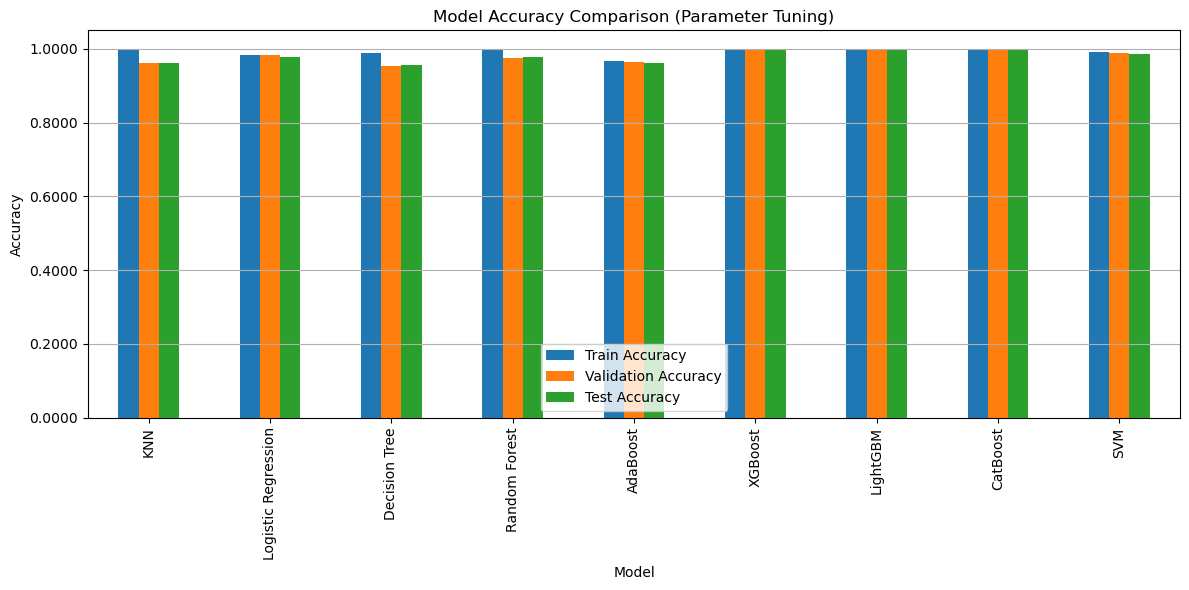

In [109]:
# Plotting Accuracy
import matplotlib.ticker as mtick

df_plot = accuracy_train_test_validation.set_index('Model')

ax = df_plot.plot(kind='bar', figsize=(12, 6))
plt.title("Model Accuracy Comparison (Parameter Tuning)")
plt.ylabel("Accuracy")

# Format y-axis to show 2 decimal places
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.4f'))

plt.ylim(0, 1.05)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("accuracy_comparison_parameter_tuning.png", dpi=300)
plt.show()

In [110]:
print("Train split performance metrics : \n")
print(train_metrics)

Train split performance metrics : 

                 Model  Accuracy  Precision    Recall  F1 Score
0                  KNN  1.000000   1.000000  1.000000  1.000000
1  Logistic Regression  0.981893   0.976939  0.973812  0.975373
2        Decision Tree  0.988679   0.996325  0.972842  0.984443
3        Random Forest  0.999821   0.999612  0.999903  0.999758
4             AdaBoost  0.967250   0.975306  0.934724  0.954584
5              XGBoost  1.000000   1.000000  1.000000  1.000000
6             LightGBM  1.000000   1.000000  1.000000  1.000000
7             CatBoost  1.000000   1.000000  1.000000  1.000000
8                  SVM  0.989964   0.989267  0.983414  0.986332


In [111]:
print("Test split performance metrics : \n")
print(test_metrics)

Test split performance metrics : 

                 Model  Accuracy  Precision    Recall  F1 Score
0                  KNN  0.961714   0.962340  0.932453  0.947161
1  Logistic Regression  0.977429   0.964643  0.974379  0.969486
2        Decision Tree  0.955143   0.958637  0.917702  0.937723
3        Random Forest  0.977714   0.979398  0.959627  0.969412
4             AdaBoost  0.961429   0.969845  0.923913  0.946322
5              XGBoost  0.998857   1.000000  0.996894  0.998445
6             LightGBM  0.998286   0.999221  0.996118  0.997667
7             CatBoost  0.997714   0.996894  0.996894  0.996894
8                  SVM  0.985429   0.982073  0.978261  0.980163


In [112]:
print("Validation split performance metrics : \n")
print(validation_metrics)

Validation split performance metrics : 

                 Model  Accuracy  Precision    Recall  F1 Score
0                  KNN  0.962286   0.959492  0.937161  0.948195
1  Logistic Regression  0.982286   0.973015  0.979054  0.976025
2        Decision Tree  0.952571   0.961380  0.907680  0.933759
3        Random Forest  0.976000   0.979316  0.955004  0.967007
4             AdaBoost  0.964857   0.974756  0.928627  0.951132
5              XGBoost  0.999714   0.999225  1.000000  0.999612
6             LightGBM  0.999143   0.999224  0.998448  0.998836
7             CatBoost  0.998286   0.997673  0.997673  0.997673
8                  SVM  0.987714   0.983696  0.982933  0.983314


In [113]:
# Best Model based on test accuracy 
best_model_name = accuracy_train_test_validation.loc[accuracy_train_test_validation['Test Accuracy'].idxmax(), 'Model']
print(best_model_name)

XGBoost


## XAI

In [150]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_scaled),
    feature_names=X.columns,
    class_names=['Not At Risk', 'At Risk'],
    mode='classification')

exp = explainer.explain_instance(X_test_scaled.iloc[42], best_xgb.predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)

/Users/rabiulislam/Documents/North_South_University/Spring_2025/CSE_445/Project/env/lib/python3.13/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/rabiulislam/Documents/North_South_University/Spring_2025/CSE_445/Project/env/lib/python3.13/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/rabiulislam/Documents/North_South_University/Spring_2025/CSE_445/Project/env/lib/python3.13/site-packages/lime/lime_tabular.py:544: Fu